### 토픽 모델링의 이해

* 토픽 모델링은 문서들에 잠재되어 있는 공통된 토픽(주제)들을 추출해 내는 기법을 의미합니다. 공통된 유사성을 도출한다는 측면에서 문서 군집화/유사도와 비슷한 기법 일 수 있지만 토픽 모델링은 문서들이 가지는 주요 토픽의 분포도와 개별 토픽이 어떤 의미인지(단어들의 분포)를 제공하는 특징을 가지고 있습니다.

### 토픽 모델링 알고리즘 유형
* LSA(Latent Semantic Analysis), pLSA
* LDA(Latent Drichlet Allocation)
* NMF(Non Negative Factorization)

* LSA와 NMF는 행렬 분해 기반 토픽 모델링
* pLSA와 LDA 확률 기반의 토픽 모델링
    * 어떤 토픽 모델링 알고리즘이든 아래 2개의 가정을 기반으로 하고 있습니다.
        * 개별 문서(Document)는 혼합된 여러 개의 주제로 구성되어 있다.
        * 개별 주제는 여러 개의 단어로 구성되어 있다.

### LDA의 이해

* 알고 있는 건 오직 문서별 단어 분포(Document-Term 행렬)
* 알아야 하는 건 문서별 토픽 분포 & 토픽별 단어 분포

* LDA는 관찰된 문서내 단어들을 이용하여 베이즈 추론을 통해 잠재된 문서내 토픽 분포와 토픽별 단어 분포를 추론하는 방식입니다. 이 때 LDA 베이즈 추론의 사전 확률분포로 사용되는 것이 디리클레 분포(Dirichlet Distribution)입니다.

### 베이즈 추론 켤레 사전 분포

|사건의 가능도|켤레 사전 분포|
|------|---|
|이항 분포|베타 분포|
|다항 분포|디리크레 분포|

* 관측되는 단어분포와 디리클레 사전 확률분포를 결합하여 지속적으로 문서의 주제 분포와 주제의 단어 분포들의 사후 확률분포를 업데이트

In [1]:
# !pip install IPython

In [2]:
from IPython.display import Image

### LDA 구성 요소

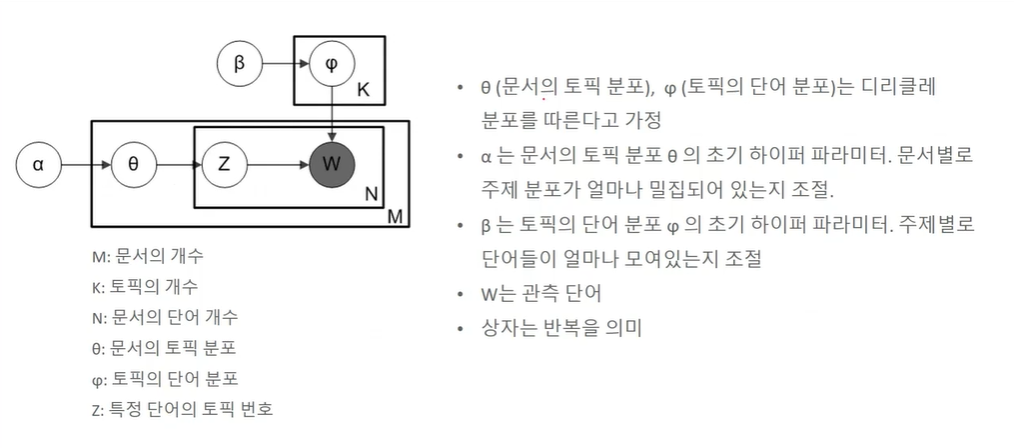

In [4]:
Image("img/LDA 구성 요소.png")

### LDA 수행 프로세스

0. 단순 count 기반 문서-단어 행렬을 생성
1. 토픽의 개수를 먼저 생성
2. 각 단어들에 임의의 주제를 최초로 할당 후 문서별 토픽 분포와 토픽별 단어 분포가 결정됨
3. 특정 단어를 하나 추출하고 해당 단어를 제외하고 문서의 토픽 분포와 토픽별 단어 분포를 재 계산. 추출된 단어는 새롭게 토픽 할당 분포 계산
4. 다른 단어를 추출하고 3 Step을 다시 수행. 모든 단어들의 토픽 할당 분포를 재계산
5. 지정된 반복 횟수만큼 3,4 Step을 수행하면서 모든 단어들의 토픽 할당 분포가 변경되지 않고 수렴될 때까지 수행

### LDA 단점

* 추출된 토픽은 다시 사람이 주관적인 해석이 필요
* 초기화 파라미터(토픽 개수, $\alpha$, $\beta$) 및 Document-Term 행렬의 단어 필터링 최적화가 어려움

### 사이킷런 LDA

* 사이킷런은 토픽 모델링 LDA를 위해 LatentDirichletAllocation 클래스를 제공
* 주요 초기화 파라미터
    * n_components : 토픽의 개수
    * doc_topic_prior : $\alpha$
    * topic_word_prior : $\beta$
    * max_iter : 반복 횟수

### 20 Newsgroup 토픽 모델링
* 20개 중 8개의 주제 데이터 로드 및 Count 기반 피처 벡터화. LDA는 Count 기반 Vectorizer만 적용합니다.

In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 등 8개 주제를 추출. 
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]

# 위에서 cats 변수로 기재된 category만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), 
                            categories=cats, random_state=0)

#LDA 는 Count기반의 Vectorizer만 적용합니다.  
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


#### LDA 객체 생성 후 Count 피처 벡터화 객체로 LDA수행

In [6]:
lda = LatentDirichletAllocation(n_components=8, random_state=0) # 토픽 개수가 8개?..
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

#### 각 토픽 모델링 주제별 단어들의 연관도 확인


* lda객체의 components_ 속성은 주제별로 개별 단어들의 연관도 정규화 숫자가 들어있음
* shape는 주제 개수 * 피처 단어 개수
* components_ 에 들어 있는 숫자값은 각 주제별로 단어가 나타난 횟수를 정규화 하여 나타냄.
* 숫자가 클수록 토픽에서 단어가 차지하는 비중이 높음

In [7]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

#### 각 토픽별 중심 단어 확인

In [8]:
def display_topic_words(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('\nTopic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1] # np.argsort() : array 정렬 후 인덱스를 반환
        top_indexes=topic_word_indexes[:no_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' + '.join([str(feature_names[i])+'*'+str(round(topic[i],1)) for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topic_words(lda, feature_names, 15)

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 등 8개 주제를 추출. 


Topic # 0
year*703.2 + 10*563.6 + game*476.3 + medical*413.2 + health*377.4 + team*346.8 + 12*343.9 + 20*340.9 + disease*332.1 + cancer*319.9 + 1993*318.3 + games*317.0 + years*306.5 + patients*299.8 + good*286.3

Topic # 1
don*1454.3 + just*1392.8 + like*1190.8 + know*1178.1 + people*836.9 + said*802.5 + think*799.7 + time*754.2 + ve*676.3 + didn*675.9 + right*636.3 + going*625.4 + say*620.7 + ll*583.9 + way*570.3

Topic # 2
image*1047.7 + file*999.1 + jpeg*799.1 + program*495.6 + gif*466.0 + images*443.7 + output*442.3 + format*442.3 + files*438.5 + color*406.3 + entry*387.6 + 00*334.8 + use*308.5 + bit*308.4 + 03*258.7

Topic # 3
like*620.7 + know*591.7 + don*543.7 + think*528.4 + use*514.3 + does*510.2 + just*509.1 + good*425.8 + time*417.4 + book*410.7 + read*402.9 + information*395.2 + people*393.5 + used*388.2 + post*368.4

Topic # 4
armenian*960.6 + israel*815.9 + armenians*699.7 + jews*690.9 + turkish*686.1 + people*653.0 + israeli*476.1 + jewish*467.0 + government*464.4 + wa

#### 개별 문서별 토픽 분포 확인

* lda객체의 transform()을 수행하면 개별 문서별 토픽 분포를 반환함.

In [9]:
doc_topics = lda.transform(feat_vect)
print(doc_topics.shape)
print(doc_topics[:3]) #(document, topic)

(7862, 8)
[[0.01389701 0.01394362 0.01389104 0.48221844 0.01397882 0.01389205
  0.01393501 0.43424401]
 [0.27750436 0.18151826 0.0021208  0.53037189 0.00212129 0.00212102
  0.00212113 0.00212125]
 [0.00544459 0.22166575 0.00544539 0.00544528 0.00544039 0.00544168
  0.00544182 0.74567512]]


#### 개별 문서별 토픽 분포도를 출력

* 20newsgroup으로 만들어진 문서명을 출력.
* fetch_20newsgroups()으로 만들어진 데이터의 filename속성은 모든 문서의 문서명을 가지고 있음.
* filename속성은 절대 디렉토리를 가지는 문서명을 가지고 있으므로 '\'로 분할하여 맨 마지막 두번째 부터 파일명으로 가져옴

In [10]:
def get_filename_list(newsdata):
    filename_list=[]

    for file in newsdata.filenames:
            #print(file)
            filename_temp = file.split('\\')[-2:]
            filename = '.'.join(filename_temp)
            filename_list.append(filename)
    
    return filename_list

filename_list = get_filename_list(news_df)
print("filename 개수:",len(filename_list), "filename list 10개만:",filename_list[:10])


filename 개수: 7862 filename list 10개만: ['soc.religion.christian.20630', 'sci.med.59422', 'comp.graphics.38765', 'comp.graphics.38810', 'sci.med.59449', 'comp.graphics.38461', 'comp.windows.x.66959', 'rec.motorcycles.104487', 'sci.electronics.53875', 'sci.electronics.53617']


#### DataFrame으로 생성하여 문서별 토픽 분포도 확인

In [11]:
import pandas as pd 

topic_names = ['Topic #'+ str(i) for i in range(0, 8)]
doc_topic_df = pd.DataFrame(data=doc_topics, columns=topic_names, index=filename_list)
doc_topic_df.head(20)

,Topic #0,Topic #1,Topic #2,Topic #3,Topic #4,Topic #5,Topic #6,Topic #7
soc.religion.christian.20630,0.013897,0.013944,0.013891,0.482218,0.013979,0.013892,0.013935,0.434244
sci.med.59422,0.277504,0.181518,0.002121,0.530372,0.002121,0.002121,0.002121,0.002121
comp.graphics.38765,0.005445,0.221666,0.005445,0.005445,0.005440,0.005442,0.005442,0.745675
comp.graphics.38810,0.005439,0.005441,0.005449,0.578959,0.005440,0.388387,0.005442,0.005442
sci.med.59449,0.006584,0.552000,0.006587,0.408485,0.006585,0.006585,0.006588,0.006585
comp.graphics.38461,0.008342,0.008352,0.182622,0.767314,0.008335,0.008341,0.008343,0.008351
comp.windows.x.66959,0.372861,0.041667,0.377020,0.041668,0.041703,0.041703,0.041667,0.041711
rec.motorcycles.104487,0.225351,0.674669,0.004814,0.075920,0.004812,0.004812,0.004812,0.004810
sci.electronics.53875,0.008944,0.836686,0.008932,0.008941,0.008935,0.109691,0.008932,0.008938
sci.electronics.53617,0.041733,0.041720,0.708081,0.041742,0.041671,0.041669,0.041699,0.041686
